In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.ticker as mticker

In [4]:
# Load the data files

pts3k = pd.read_csv('/home/sepal-user/CAFI_DDD/3kpoints.csv', delimiter=';')

In [5]:
pts3k.head()

,fid,index,point_id,images,mon_images,bfast_chan,bfast_magn,bfast_mean,cusum_chan,cusum_conf,...,Plan eau-Niveau 3(2022),Cours et voie eau-Niveau 3 (2022),Changement 2020-2022,Annee de Deforestation 2020-2022,Moteur de deforestation 2020-2022,Gain 2020-2022,Annee de Degradation 2020-2022,Moteur de degradation 2020-2022,Confiance,Ajouter un commentaire
0,388,227679,150023,126,58,-1.0,0.0,0.0,2019.052,0.422638,...,NaN,NaN,Stable,NaN,NaN,NaN,NaN,NaN,Eleve,Ajouter un commentaire
1,406,280646,167931,125,49,-1.0,0.0,0.0,2019.052,0.502775,...,NaN,NaN,Stable,NaN,NaN,NaN,NaN,NaN,Eleve,Ajouter un commentaire
2,757,220681,99725,130,58,-1.0,0.0,0.0,2020.038,0.218147,...,NaN,NaN,Stable,NaN,NaN,NaN,NaN,NaN,Eleve,Ajouter un commentaire
3,766,155323,116525,130,60,-1.0,0.0,0.0,2017.079,0.244145,...,NaN,NaN,Stable,NaN,NaN,NaN,NaN,NaN,Eleve,Ajouter un commentaire
4,835,226426,128783,118,50,-1.0,0.0,0.0,2019.907,0.353422,...,NaN,NaN,Stable,NaN,NaN,NaN,NaN,NaN,Eleve,Ajouter un commentaire


In [6]:
len(pts3k)

3467

In [7]:
# Dictionary mapping old column names to new ones
pts3k_clean = {
    'point_id': 'point_id',
    'PlotID': 'plot_id',
    'chg_prob': 'chg_prob',
    'kmeans': 'kmeans',
    'Occupation 2015': 'ocs_2015',
    'TG-Niveau 2(2015)': 'tg_n_2_2015',
    'EH-Niveau 2 (2015)': 'eh_n_2_2015',
    'TH-Niveau 2 (2015)': 'th_n_2_2015',
    'AT-Niveau 2 (2015)': 'at_n_2_2015',
    'TC-Niveau-2-2015': 'tc_n_2_2015',
    'TF - Niveau 2 – (2015)': 'tf_n_2_2015',
    'Occupation 2020': 'ocs_2020',
    'TH-Niveau 2 (2020)': 'th_n_2_2020',
    'TC-Niveau-2 (2020)': 'tc_n_2_2020',
    'AT-Niveau 2 (2020)': 'at_n_2_2020',
    'EH-Niveau 2 (2020)': 'eh_n_2_2020',
    'TG-Niveau 2 (2020)': 'tg_n_2_2020',
    'TF - Niveau 2 – (2020)': 'tf_n_2_2020',
    'Occupation 2022': 'ocs_2022',
    'AT-Niveau 2 (2022)': 'at_n_2_2022',
    'TH-Niveau 2 (2022)': 'th_n_2_2022',
    'TG-Niveau 2 (2022)': 'tg_n_2_2022',
    'EH-Niveau 2 (2022)': 'eh_n_2_2022',
    'TC-Niveau-2 (2022)': 'tc_n_2_2022',
    'TF - Niveau 2 – (2022)': 'tf_n_2_2022',
    'Changement 2015-2020': 'chg_1520',
    'Changement 2020-2022': 'chg_2022',
    'Annee de Deforestation 2015-2020': 'def_year_1520',
    'Annee de Deforestation 2020-2022': 'def_year_2022',
    'Moteur de deforestation 2015-2020': 'def_moteur_1520',
    'Moteur de deforestation 2020-2022': 'def_moteur_2022',
    'Annee de Degradation 2015-2020': 'deg_year_1520',
    'Annee de Degradation 2020-2022': 'deg_year_2022',
    'Moteur de degradation 2015-2020': 'deg_moteur_1520',
    'Moteur de degradation 2020-2022': 'deg_moteur_2022',
    'Gain 2015-2020': 'gain_1520',
    'Gain 2020-2022': 'gain_2022',
}

In [8]:
pts3k.rename(columns=pts3k_clean, inplace=True)

In [9]:
pts3k.head()

,fid,index,point_id,images,mon_images,bfast_chan,bfast_magn,bfast_mean,cusum_chan,cusum_conf,...,Plan eau-Niveau 3(2022),Cours et voie eau-Niveau 3 (2022),chg_2022,def_year_2022,def_moteur_2022,gain_2022,deg_year_2022,deg_moteur_2022,Confiance,Ajouter un commentaire
0,388,227679,150023,126,58,-1.0,0.0,0.0,2019.052,0.422638,...,NaN,NaN,Stable,NaN,NaN,NaN,NaN,NaN,Eleve,Ajouter un commentaire
1,406,280646,167931,125,49,-1.0,0.0,0.0,2019.052,0.502775,...,NaN,NaN,Stable,NaN,NaN,NaN,NaN,NaN,Eleve,Ajouter un commentaire
2,757,220681,99725,130,58,-1.0,0.0,0.0,2020.038,0.218147,...,NaN,NaN,Stable,NaN,NaN,NaN,NaN,NaN,Eleve,Ajouter un commentaire
3,766,155323,116525,130,60,-1.0,0.0,0.0,2017.079,0.244145,...,NaN,NaN,Stable,NaN,NaN,NaN,NaN,NaN,Eleve,Ajouter un commentaire
4,835,226426,128783,118,50,-1.0,0.0,0.0,2019.907,0.353422,...,NaN,NaN,Stable,NaN,NaN,NaN,NaN,NaN,Eleve,Ajouter un commentaire


In [10]:
# Group the data by 'point_id' and then aggregate using 'first' non-null value for each column
group_pts3k = pts3k.groupby('point_id').first().reset_index()
group_pts3k.head()

,point_id,fid,index,images,mon_images,bfast_chan,bfast_magn,bfast_mean,cusum_chan,cusum_conf,...,Plan eau-Niveau 3(2022),Cours et voie eau-Niveau 3 (2022),chg_2022,def_year_2022,def_moteur_2022,gain_2022,deg_year_2022,deg_moteur_2022,Confiance,Ajouter un commentaire
0,9,9209,40616,120,55,2018.805,-221.910278,-1.584789,2017.797,0.610123,...,None,None,Stable,NaN,None,NaN,NaN,None,Eleve,Ajouter un commentaire
1,100,6922,29971,110,43,-1.000,0.000000,0.000000,2020.099,0.396961,...,None,None,Stable,NaN,None,NaN,NaN,None,Eleve,RAS
2,134,9210,27263,115,52,2019.068,-187.211411,-1.960646,2018.367,0.606854,...,None,None,Stable,NaN,None,NaN,NaN,None,Eleve,Ajouter un commentaire
3,140,9234,37822,118,51,2016.858,-329.271881,-1.765319,2016.003,0.550281,...,None,None,Stable,NaN,None,NaN,NaN,None,Eleve,Ajouter un commentaire
4,185,9233,35575,122,58,2016.266,-1191.523438,-3.540285,2016.090,0.440950,...,None,None,Stable,NaN,None,NaN,NaN,None,Eleve,Ajouter un commentaire


In [11]:
list(group_pts3k)

['point_id',
 'fid',
 'index',
 'images',
 'mon_images',
 'bfast_chan',
 'bfast_magn',
 'bfast_mean',
 'cusum_chan',
 'cusum_conf',
 'cusum_magn',
 'red_mean',
 'red_sd',
 'red_min',
 'red_max',
 'nir_mean',
 'nir_sd',
 'nir_min',
 'nir_max',
 'swir1_mean',
 'swir1_sd',
 'swir1_min',
 'swir1_max',
 'swir2_mean',
 'swir2_sd',
 'swir2_min',
 'swir2_max',
 'ndfi_mean',
 'ndfi_sd',
 'ndfi_min',
 'ndfi_max',
 'brightness',
 'brightne_1',
 'brightne_2',
 'brightne_3',
 'greenness_',
 'greennes_1',
 'greennes_2',
 'greennes_3',
 'wetness_me',
 'wetness_sd',
 'wetness_mi',
 'wetness_ma',
 'bs_slope_m',
 'bs_slope_s',
 'bs_slope_1',
 'bs_slope_2',
 'ewma_jrc_d',
 'ewma_jrc_c',
 'ewma_jrc_m',
 'mosum_jrc_',
 'mosum_jr_1',
 'mosum_jr_2',
 'cusum_jrc_',
 'cusum_jr_1',
 'cusum_jr_2',
 'ccdc_chang',
 'ccdc_magni',
 'aspect',
 'dw_class_m',
 'dw_tree_pr',
 'dw_tree__1',
 'dw_tree__2',
 'dw_tree__3',
 'elevation',
 'esa_lc20',
 'esa_lc21',
 'esri_lc17',
 'esri_lc18',
 'esri_lc19',
 'esri_lc20',
 'esri

In [12]:
# Define the columns to combine
n2_2015 = ['at_n_2_2015', 'th_n_2_2015', 'tg_n_2_2015', 'eh_n_2_2015', 'tc_n_2_2015', 'tf_n_2_2015']
n2_2020 = ['at_n_2_2020', 'th_n_2_2020', 'tg_n_2_2020', 'eh_n_2_2020', 'tc_n_2_2020', 'tf_n_2_2020']
n2_2022 = ['at_n_2_2022', 'th_n_2_2022', 'tg_n_2_2022', 'eh_n_2_2022', 'tc_n_2_2022', 'tf_n_2_2022']

In [14]:
# Concatenate the values from the specified columns into a single string
group_pts3k['ocs_n2_2015'] = group_pts3k.apply(lambda row: ', '.join([str(row[col]) for col in n2_2015 if pd.notnull(row[col])]), axis=1)

In [15]:
# Concatenate the values from the specified columns into a single string
group_pts3k['ocs_n2_2020'] = group_pts3k.apply(lambda row: ', '.join([str(row[col]) for col in n2_2020 if pd.notnull(row[col])]), axis=1)

In [16]:
# Concatenate the values from the specified columns into a single string
group_pts3k['ocs_n2_2022'] = group_pts3k.apply(lambda row: ', '.join([str(row[col]) for col in n2_2022 if pd.notnull(row[col])]), axis=1)

In [17]:
group_pts3k.head()

,point_id,fid,index,images,mon_images,bfast_chan,bfast_magn,bfast_mean,cusum_chan,cusum_conf,...,def_year_2022,def_moteur_2022,gain_2022,deg_year_2022,deg_moteur_2022,Confiance,Ajouter un commentaire,ocs_n2_2015,ocs_n2_2020,ocs_n2_2022
0,9,9209,40616,120,55,2018.805,-221.910278,-1.584789,2017.797,0.610123,...,NaN,None,NaN,NaN,None,Eleve,Ajouter un commentaire,Foret secondaire ou degradee,Foret secondaire ou degradee,Foret secondaire ou degradee
1,100,6922,29971,110,43,-1.000,0.000000,0.000000,2020.099,0.396961,...,NaN,None,NaN,NaN,None,Eleve,RAS,Foret secondaire ou degradee,Foret secondaire ou degradee,Foret secondaire ou degradee
2,134,9210,27263,115,52,2019.068,-187.211411,-1.960646,2018.367,0.606854,...,NaN,None,NaN,NaN,None,Eleve,Ajouter un commentaire,Amenagement agricole,Amenagement agricole,Amenagement agricole
3,140,9234,37822,118,51,2016.858,-329.271881,-1.765319,2016.003,0.550281,...,NaN,None,NaN,NaN,None,Eleve,Ajouter un commentaire,Amenagement agricole,Amenagement agricole,Amenagement agricole
4,185,9233,35575,122,58,2016.266,-1191.523438,-3.540285,2016.090,0.440950,...,NaN,None,NaN,NaN,None,Eleve,Ajouter un commentaire,Cacao,Cacao,Cacao


In [18]:
group_pts3k.dtypes

point_id                   int64
fid                        int64
index                      int64
images                     int64
mon_images                 int64
                           ...  
Confiance                 object
Ajouter un commentaire    object
ocs_n2_2015               object
ocs_n2_2020               object
ocs_n2_2022               object
Length: 190, dtype: object

In [19]:
# Define the columns to change data type
new_type = ['def_year_2022', 'deg_year_2022', 'def_year_1520', 'deg_year_1520', 'plot_id', 'kmeans','point_id']

In [20]:
# change the data type to int64
for column in new_type:
    group_pts3k[column] = group_pts3k[column].astype('Int64')

In [21]:
group_pts3k.dtypes

point_id                   Int64
fid                        int64
index                      int64
images                     int64
mon_images                 int64
                           ...  
Confiance                 object
Ajouter un commentaire    object
ocs_n2_2015               object
ocs_n2_2020               object
ocs_n2_2022               object
Length: 190, dtype: object

In [22]:
# Define the range of years to be considered
years_range = range(2015, 2021)

In [23]:
# Create new columns for def_year and deg_year
for year in years_range:
    group_pts3k[f'def_year{year}'] = group_pts3k['def_year_1520'].apply(lambda y: 1 if str(year) in str(y).split(',') else 0)
    group_pts3k[f'deg_year{year}'] = group_pts3k['deg_year_1520'].apply(lambda y: 1 if str(year) in str(y).split(',') else 0)


In [24]:
group_pts3k.head()

,point_id,fid,index,images,mon_images,bfast_chan,bfast_magn,bfast_mean,cusum_chan,cusum_conf,...,def_year2016,deg_year2016,def_year2017,deg_year2017,def_year2018,deg_year2018,def_year2019,deg_year2019,def_year2020,deg_year2020
0,9,9209,40616,120,55,2018.805,-221.910278,-1.584789,2017.797,0.610123,...,0,0,0,0,0,0,0,0,0,0
1,100,6922,29971,110,43,-1.000,0.000000,0.000000,2020.099,0.396961,...,0,0,0,0,0,0,0,0,0,0
2,134,9210,27263,115,52,2019.068,-187.211411,-1.960646,2018.367,0.606854,...,0,0,0,0,0,0,0,0,0,0
3,140,9234,37822,118,51,2016.858,-329.271881,-1.765319,2016.003,0.550281,...,0,0,0,0,0,0,0,0,0,0
4,185,9233,35575,122,58,2016.266,-1191.523438,-3.540285,2016.090,0.440950,...,0,0,0,0,0,0,0,0,0,0


#### 10.000 points, dont 1100 points de haute proba de changement (kmeans class= 0)

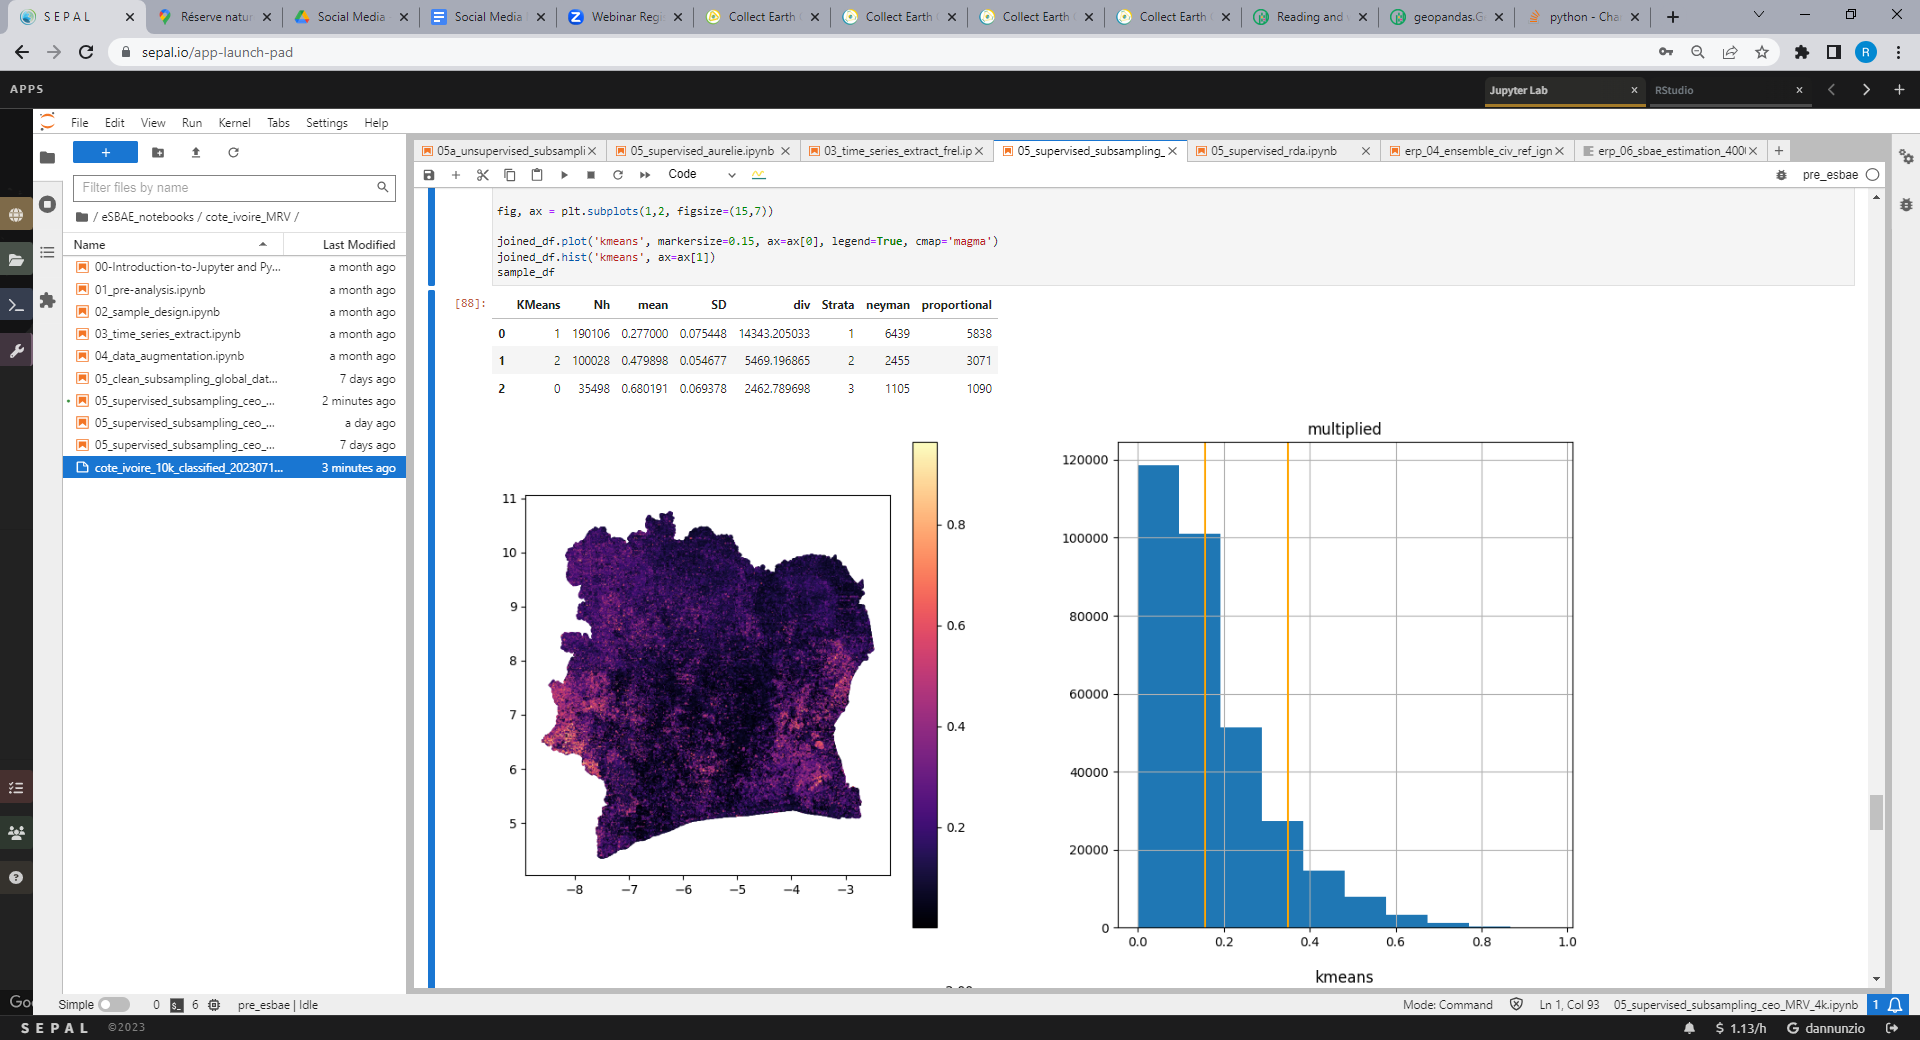

#### Masque Forêt

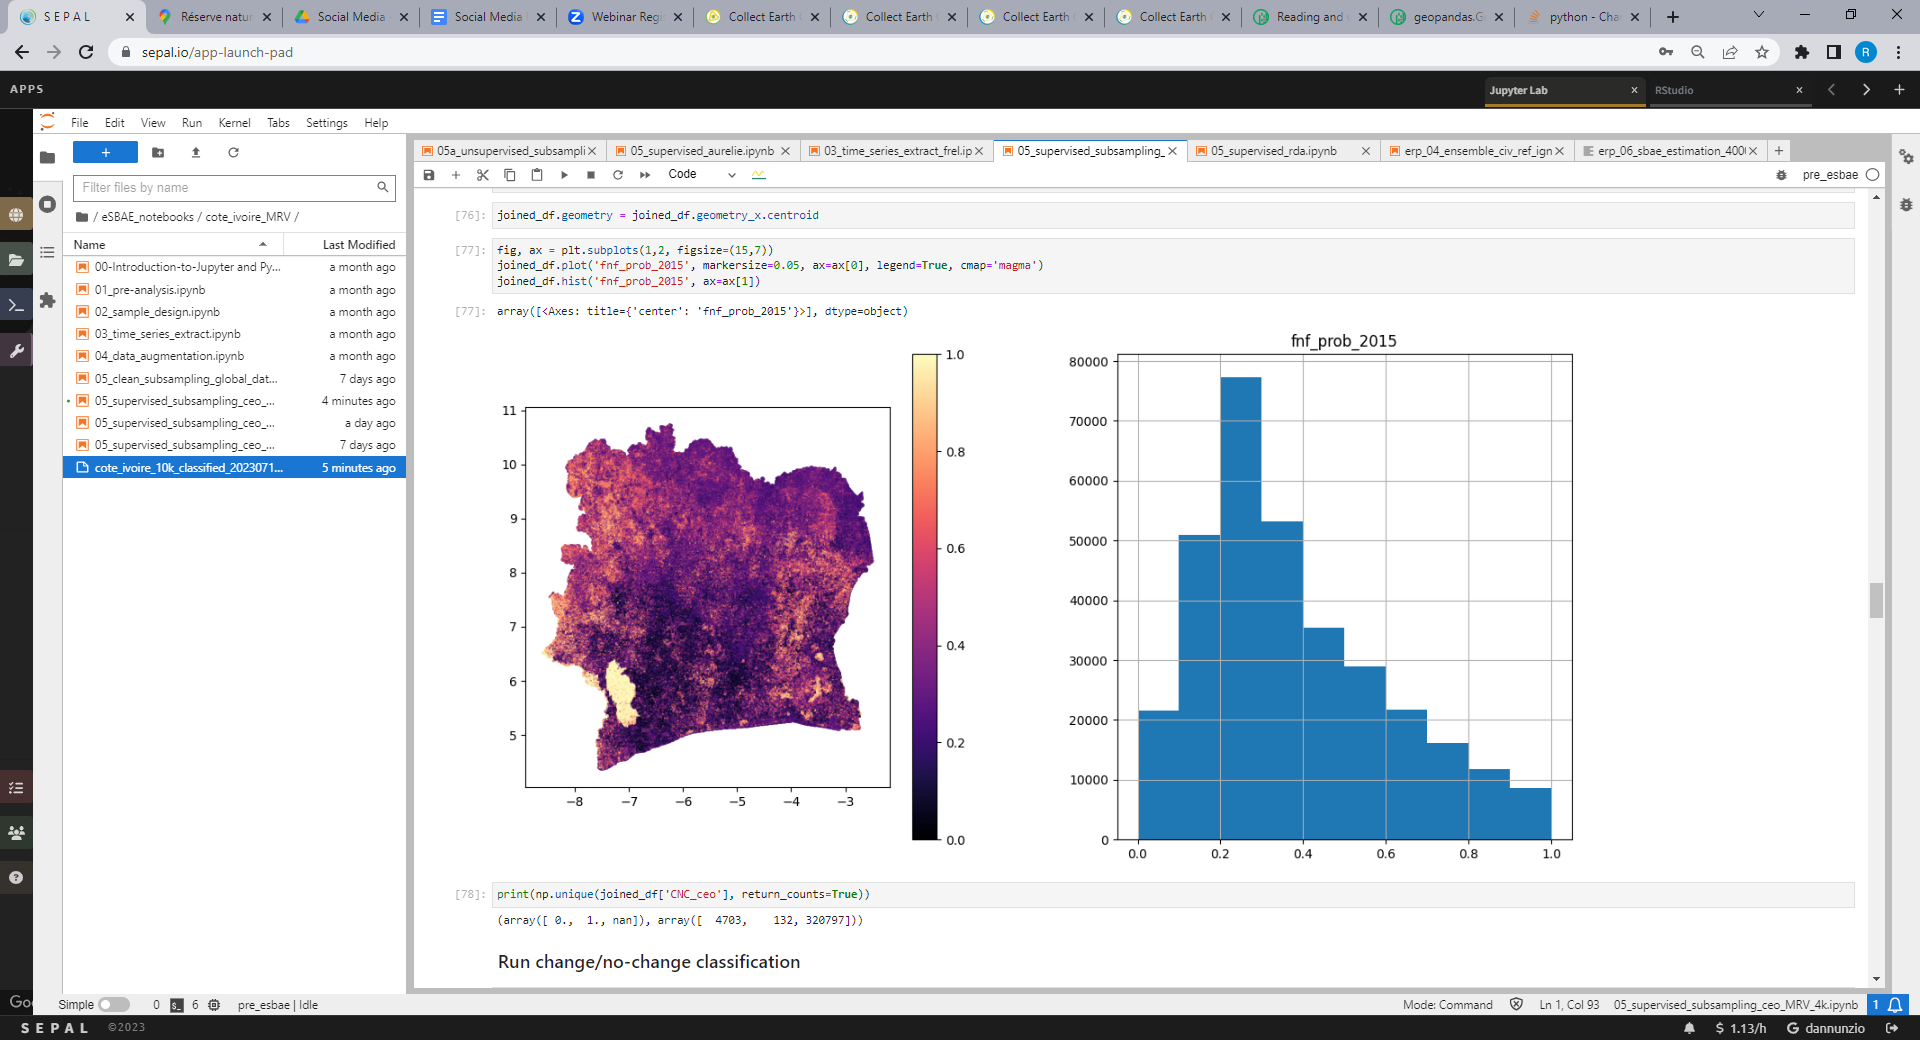

In [25]:
points_strata_def = pd.pivot_table(group_pts3k, values = 'point_id', index = 'def_year_1520',columns = 'kmeans', aggfunc =  "count")
points_strata_def

kmeans,0,1,2
def_year_1520,,,
2016,1.0,NaN,23.0
2017,3.0,1.0,8.0
2018,8.0,2.0,12.0
2019,6.0,2.0,9.0
2020,2.0,1.0,4.0


In [26]:
points_strata_deg = pd.pivot_table(group_pts3k, values = 'point_id', index = 'deg_year_1520',columns = 'kmeans', aggfunc =  "count")
points_strata_deg

kmeans,0,1,2
deg_year_1520,,,
2016,1.0,20.0,5.0
2017,2.0,4.0,14.0
2018,1.0,7.0,21.0
2019,1.0,5.0,25.0
2020,NaN,4.0,6.0


In [27]:
group_pts3k.dtypes

point_id        Int64
fid             int64
index           int64
images          int64
mon_images      int64
                ...  
deg_year2018    int64
def_year2019    int64
deg_year2019    int64
def_year2020    int64
deg_year2020    int64
Length: 202, dtype: object

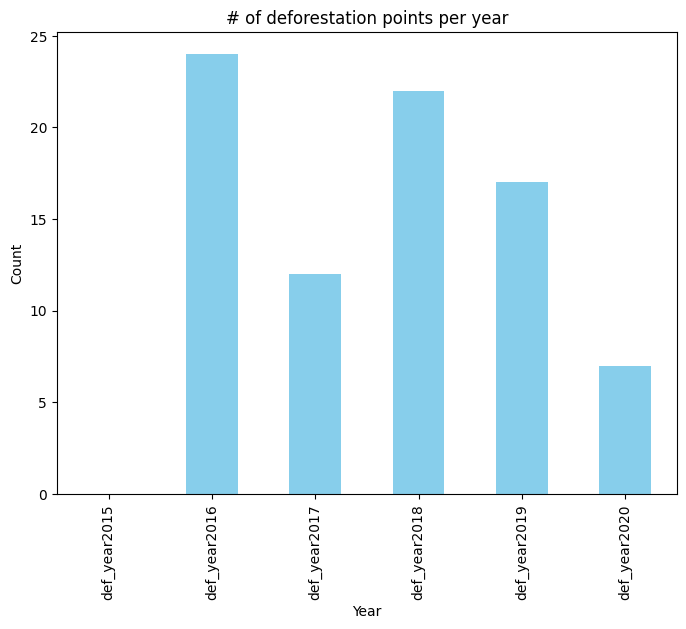

In [28]:
#select the values you want to plot
values_to_plot = ['def_year2015', 'def_year2016','def_year2017','def_year2018','def_year2019','def_year2020']

# Initialize a dictionary to hold the counts for each year
def_value_counts = {year: (group_pts3k[year] == 1).sum() for year in values_to_plot}

# Convert to a Series for plotting
def_value_counts_series = pd.Series(def_value_counts)

# Plot the value counts as a bar graph
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
def_value_counts_series.plot(kind='bar', color='skyblue')

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('# of deforestation points per year')

# Show the plot
plt.show()

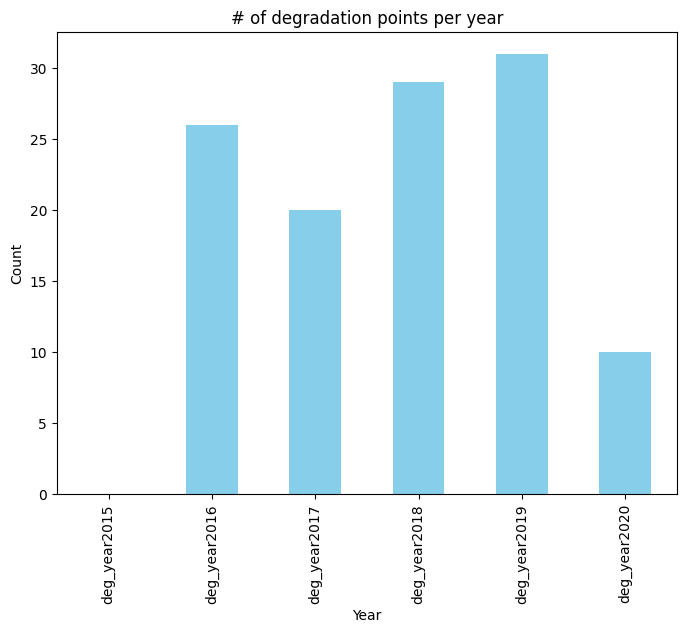

In [29]:
#select the values you want to plot
values_to_plot = ['deg_year2015', 'deg_year2016','deg_year2017','deg_year2018','deg_year2019','deg_year2020']

# Initialize a dictionary to hold the counts for each year
def_value_counts = {year: (group_pts3k[year] == 1).sum() for year in values_to_plot}

# Convert to a Series for plotting
def_value_counts_series = pd.Series(def_value_counts)

# Plot the value counts as a bar graph
plt.figure(figsize=(8, 6))  # Optional: Set the figure size
def_value_counts_series.plot(kind='bar', color='skyblue')

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('# of degradation points per year')

# Show the plot
plt.show()

In [30]:
group_pts3k['CNC'] = group_pts3k['chg_1520'].apply(lambda x: 1 if x in ['Gain', 'Degradation', 'Deforestation'] else 0)

In [32]:
group_pts3k

,point_id,fid,index,images,mon_images,bfast_chan,bfast_magn,bfast_mean,cusum_chan,cusum_conf,...,deg_year2016,def_year2017,deg_year2017,def_year2018,deg_year2018,def_year2019,deg_year2019,def_year2020,deg_year2020,CNC
0,9,9209,40616,120,55,2018.805,-221.910278,-1.584789,2017.797,0.610123,...,0,0,0,0,0,0,0,0,0,0
1,100,6922,29971,110,43,-1.000,0.000000,0.000000,2020.099,0.396961,...,0,0,0,0,0,0,0,0,0,0
2,134,9210,27263,115,52,2019.068,-187.211411,-1.960646,2018.367,0.606854,...,0,0,0,0,0,0,0,0,0,0
3,140,9234,37822,118,51,2016.858,-329.271881,-1.765319,2016.003,0.550281,...,0,0,0,0,0,0,0,0,0,0
4,185,9233,35575,122,58,2016.266,-1191.523438,-3.540285,2016.090,0.440950,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3462,327410,4470,347,244,102,-1.000,0.000000,0.000000,2020.942,0.351051,...,0,0,0,0,0,0,0,0,0,0
3463,327464,8181,600,231,96,2017.107,-1219.994507,-1.570876,2016.978,-0.014062,...,0,0,0,0,0,0,0,0,0,0
3464,327572,8360,53,243,103,2019.014,-1415.959717,-1.298792,2018.005,0.316591,...,0,0,0,0,0,0,0,0,0,0
3465,327659,9696,527,215,99,2017.173,-1883.565552,-3.288492,2017.962,0.220154,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# Save the updated DataFrame to a new CSV file
group_pts3k.to_csv('/home/sepal-user/CAFI_DDD/3K.csv', index=False, sep=';')

In [ ]:
# Convert the year columns to string and remove any trailing '.0'
#group_3k['def_year'] = group_3k['def_year_1520'].apply(lambda x: str(int(float(x))) if pd.notnull(x) else x)
#group_3k['deg_year'] = group_3k['deg_year_1520'].apply(lambda x: str(int(float(x))) if pd.notnull(x) else x)

In [ ]:
# Create new columns for def_year and deg_year
#for year in years_range:
   # year_str = str(year)
    #group_3k[f'def_year_{year}'] = group_3k['def_year_1520'].apply(lambda y: 1 if year_str in str(y).split(',') else 0)
    #group_3k[f'deg_year_{year}'] = group_3k['deg_year_1520'].apply(lambda y: 1 if year_str in str(y).split(',') else 0)

# Save the updated DataFrame to a new CSV file